In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1527275295646408627
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14674281152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1186227179653800555
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [4]:
train, test = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [5]:
train[0].shape, test[0].shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
train[1].shape, test[1].shape

((50000, 1), (10000, 1))

In [7]:
x_train = train[0] /225
x_test = test[0] /225

In [8]:
t_train = train[1]
t_test = test[1]

In [9]:
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
t_train, t_test = t_train.astype('int32'), t_test.astype('int32')

In [10]:
import os, random

def reset_seed(seed = 0):
  os.environ['PYTHONHASHSEED'] = '0'
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)

In [11]:
from tensorflow.keras import models, layers

reset_seed(0)

model = models.Sequential([
                           layers.Conv2D(filters = 3, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
                           layers.MaxPool2D(pool_size = (2, 2)),
                           layers.Flatten(),
                           layers.Dense(100, activation = 'relu'),
                           layers.Dense(10, activation = 'softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 3)         84        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 3)         0         
_________________________________________________________________
flatten (Flatten)            (None, 675)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               67600     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 68,694
Trainable params: 68,694
Non-trainable params: 0
_________________________________________________________________


In [13]:
optimizer = tf.keras.optimizers.Adam(lr = 0.01)

model.compile(optimizer = optimizer,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
batch_size = 4096
epochs = 30

history = model.fit(x_train, t_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (x_test, t_test))

Epoch 1/30
13/13 [==============================] - 34s 80ms/step - loss: 2.2547 - accuracy: 0.1605 - val_loss: 2.0020 - val_accuracy: 0.2829
Epoch 2/30
13/13 [==============================] - 1s 39ms/step - loss: 1.9224 - accuracy: 0.3271 - val_loss: 1.7605 - val_accuracy: 0.3790
Epoch 3/30
13/13 [==============================] - 0s 36ms/step - loss: 1.7064 - accuracy: 0.3966 - val_loss: 1.6287 - val_accuracy: 0.4167
Epoch 4/30
13/13 [==============================] - 0s 38ms/step - loss: 1.5895 - accuracy: 0.4323 - val_loss: 1.5743 - val_accuracy: 0.4367
Epoch 5/30
13/13 [==============================] - 0s 38ms/step - loss: 1.5092 - accuracy: 0.4585 - val_loss: 1.5465 - val_accuracy: 0.4443
Epoch 6/30
13/13 [==============================] - 0s 37ms/step - loss: 1.4648 - accuracy: 0.4742 - val_loss: 1.5024 - val_accuracy: 0.4603
Epoch 7/30
13/13 [==============================] - 0s 38ms/step - loss: 1.4380 - accuracy: 0.4832 - val_loss: 1.5394 - val_accuracy: 0.4541
Epoch 8/30
1

In [15]:
from tensorflow.keras.applications import resnet, VGG16
base_model = VGG16(input_shape = (224, 224, 3),
                   include_top = False,
                   weights = 'imagenet')

58892288/58889256 [==============================] - 0s 0us/step


In [16]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
train_choice = np.random.randint(low = 0, high = 50000, size = 5000)
# train_choice = np.random.randint(low = 0, high = 50000, size = 10000)

test_choice = np.random.randint(low = 0, high = 10000, size = 1000)
# test_choice = np.random.randint(low = 0, high = 10000, size = 5000)

In [18]:
x_train = train[0][train_choice]
x_test = test[0][test_choice]
t_train = train[1][train_choice].astype('int32')
t_test = test[1][test_choice].astype('int32')

In [19]:
_train = []

for img in x_train:
  _train.append(cv2.resize(src = img, dsize = (224, 224)))

In [20]:
x_train = np.array(_train, dtype = 'float32') / 255.0

In [21]:
del _train

In [22]:
_test = []

for img in x_test:
  _test.append(cv2.resize(src = img, dsize = (224, 224)))

In [23]:
x_test = np.array(_test, dtype = 'float32') / 255.0

In [24]:
del _test

In [25]:
x_train.shape, x_test.shape

((5000, 224, 224, 3), (1000, 224, 224, 3))

In [26]:
reset_seed(0)

finetuned_model = models.Sequential([
                                     base_model,
                                     layers.GlobalAveragePooling2D(),
                                     layers.Dense(512, activation = 'relu'),
                                     layers.Dense(10, activation = 'softmax')
])

In [27]:
optimizer = tf.keras.optimizers.SGD(lr = 0.01)

finetuned_model.compile(optimizer = optimizer,
                        loss = 'sparse_categorical_crossentropy',
                        metrics = ['accuracy'])

In [28]:
finetuned_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 14,982,474
Trainable params: 14,982,474
Non-trainable params: 0
_________________________________________________________________


In [29]:
loss, accuracy = finetuned_model.evaluate(x_test, t_test)

32/32 [==============================] - 11s 168ms/step - loss: 2.4392 - accuracy: 0.0927


In [30]:
print(f'loss : {loss}, accuracy : {accuracy}')

loss : 2.4468395709991455, accuracy : 0.10199999809265137


In [31]:
history = finetuned_model.fit(x_train, t_train,
                              epochs = 10,
                              batch_size = 32,
                              validation_data = (x_test, t_test))

Epoch 1/10
157/157 [==============================] - 69s 410ms/step - loss: 2.2041 - accuracy: 0.1754 - val_loss: 2.2975 - val_accuracy: 0.1520
Epoch 2/10
157/157 [==============================] - 65s 417ms/step - loss: 1.8624 - accuracy: 0.3386 - val_loss: 3.5005 - val_accuracy: 0.1790
Epoch 3/10
157/157 [==============================] - 67s 427ms/step - loss: 1.5974 - accuracy: 0.4556 - val_loss: 2.4714 - val_accuracy: 0.3070
Epoch 4/10
157/157 [==============================] - 68s 435ms/step - loss: 1.3429 - accuracy: 0.5272 - val_loss: 1.1947 - val_accuracy: 0.5390
Epoch 5/10
157/157 [==============================] - 69s 438ms/step - loss: 1.0647 - accuracy: 0.6350 - val_loss: 1.1863 - val_accuracy: 0.5840
Epoch 6/10
157/157 [==============================] - 68s 435ms/step - loss: 0.8092 - accuracy: 0.7258 - val_loss: 1.5387 - val_accuracy: 0.5000
Epoch 7/10
157/157 [==============================] - 68s 436ms/step - loss: 0.6462 - accuracy: 0.7704 - val_loss: 2.2913 - val_ac

In [32]:
results = pd.DataFrame(history.history)
results.tail()

,loss,accuracy,val_loss,val_accuracy
5,0.809224,0.7258,1.538716,0.500
6,0.646183,0.7704,2.291312,0.401
7,0.664044,0.7840,0.678960,0.771
8,0.472660,0.8426,1.757486,0.479
9,0.423589,0.8582,0.927553,0.704


Text(0.5, 0, 'epochs')

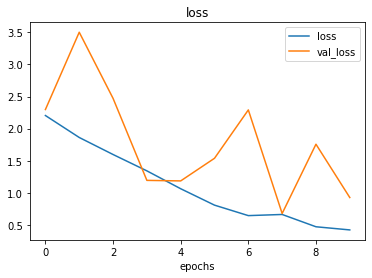

In [33]:
results[['loss', 'val_loss']].plot(title = 'loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

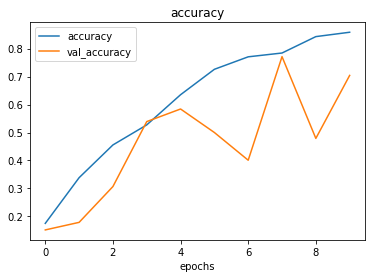

In [34]:
results[['accuracy', 'val_accuracy']].plot(title = 'accuracy')
plt.xlabel('epochs')